# NOTEBOOK - YOLOv8

In order to train the model we first access the GPU by using the nvidia-smi command to do that.

In [ ]:
!nvidia-smi

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. In this case, we decided to insall using pip command. The version we install is 8.0.196:

In [3]:
!pip install ultralytics==8.0.196

from IPython import display

display.clear_output()

from IPython.display import display, Image

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


We create a folder in the directory called dataset were we are gonna load the CATARACT dataset:

In [ ]:
!mkdir {HOME}/dataset
%cd {HOME}/dataset

/content/dataset


The dataset was annotated using Roboflow. This platform allows to access the dataset directly from the notebook, 
we just need to specify the version and project name. For privacy reasons the key and workspace have been ommited. 

In [4]:
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="---")
project = rf.workspace("---").project("surgical-instruments-d0yjo")
version = project.version(5)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to surgical-instruments-5 in yolov8:: 100%|██████████| 842/842 [00:00<00:00, 5391.90it/s]


In order to train the YOLOv8 model we need to define several aspects such as model iteration (medium), epcohs (50), 
and image size (640).

In [5]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8m.pt data=/content/surgical-instruments-5/data.yaml epochs=50 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 355MB/s]
New https://pypi.org/project/ultralytics/8.2.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/surgical-instruments-5/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_bu

After the model is trained, a new folder will be automatically created inside the detect directory containing 
the weights and other additional graphs. 

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch921.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch922.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1715695113.ba6e77be1cad.2711.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch920.jpg


/content


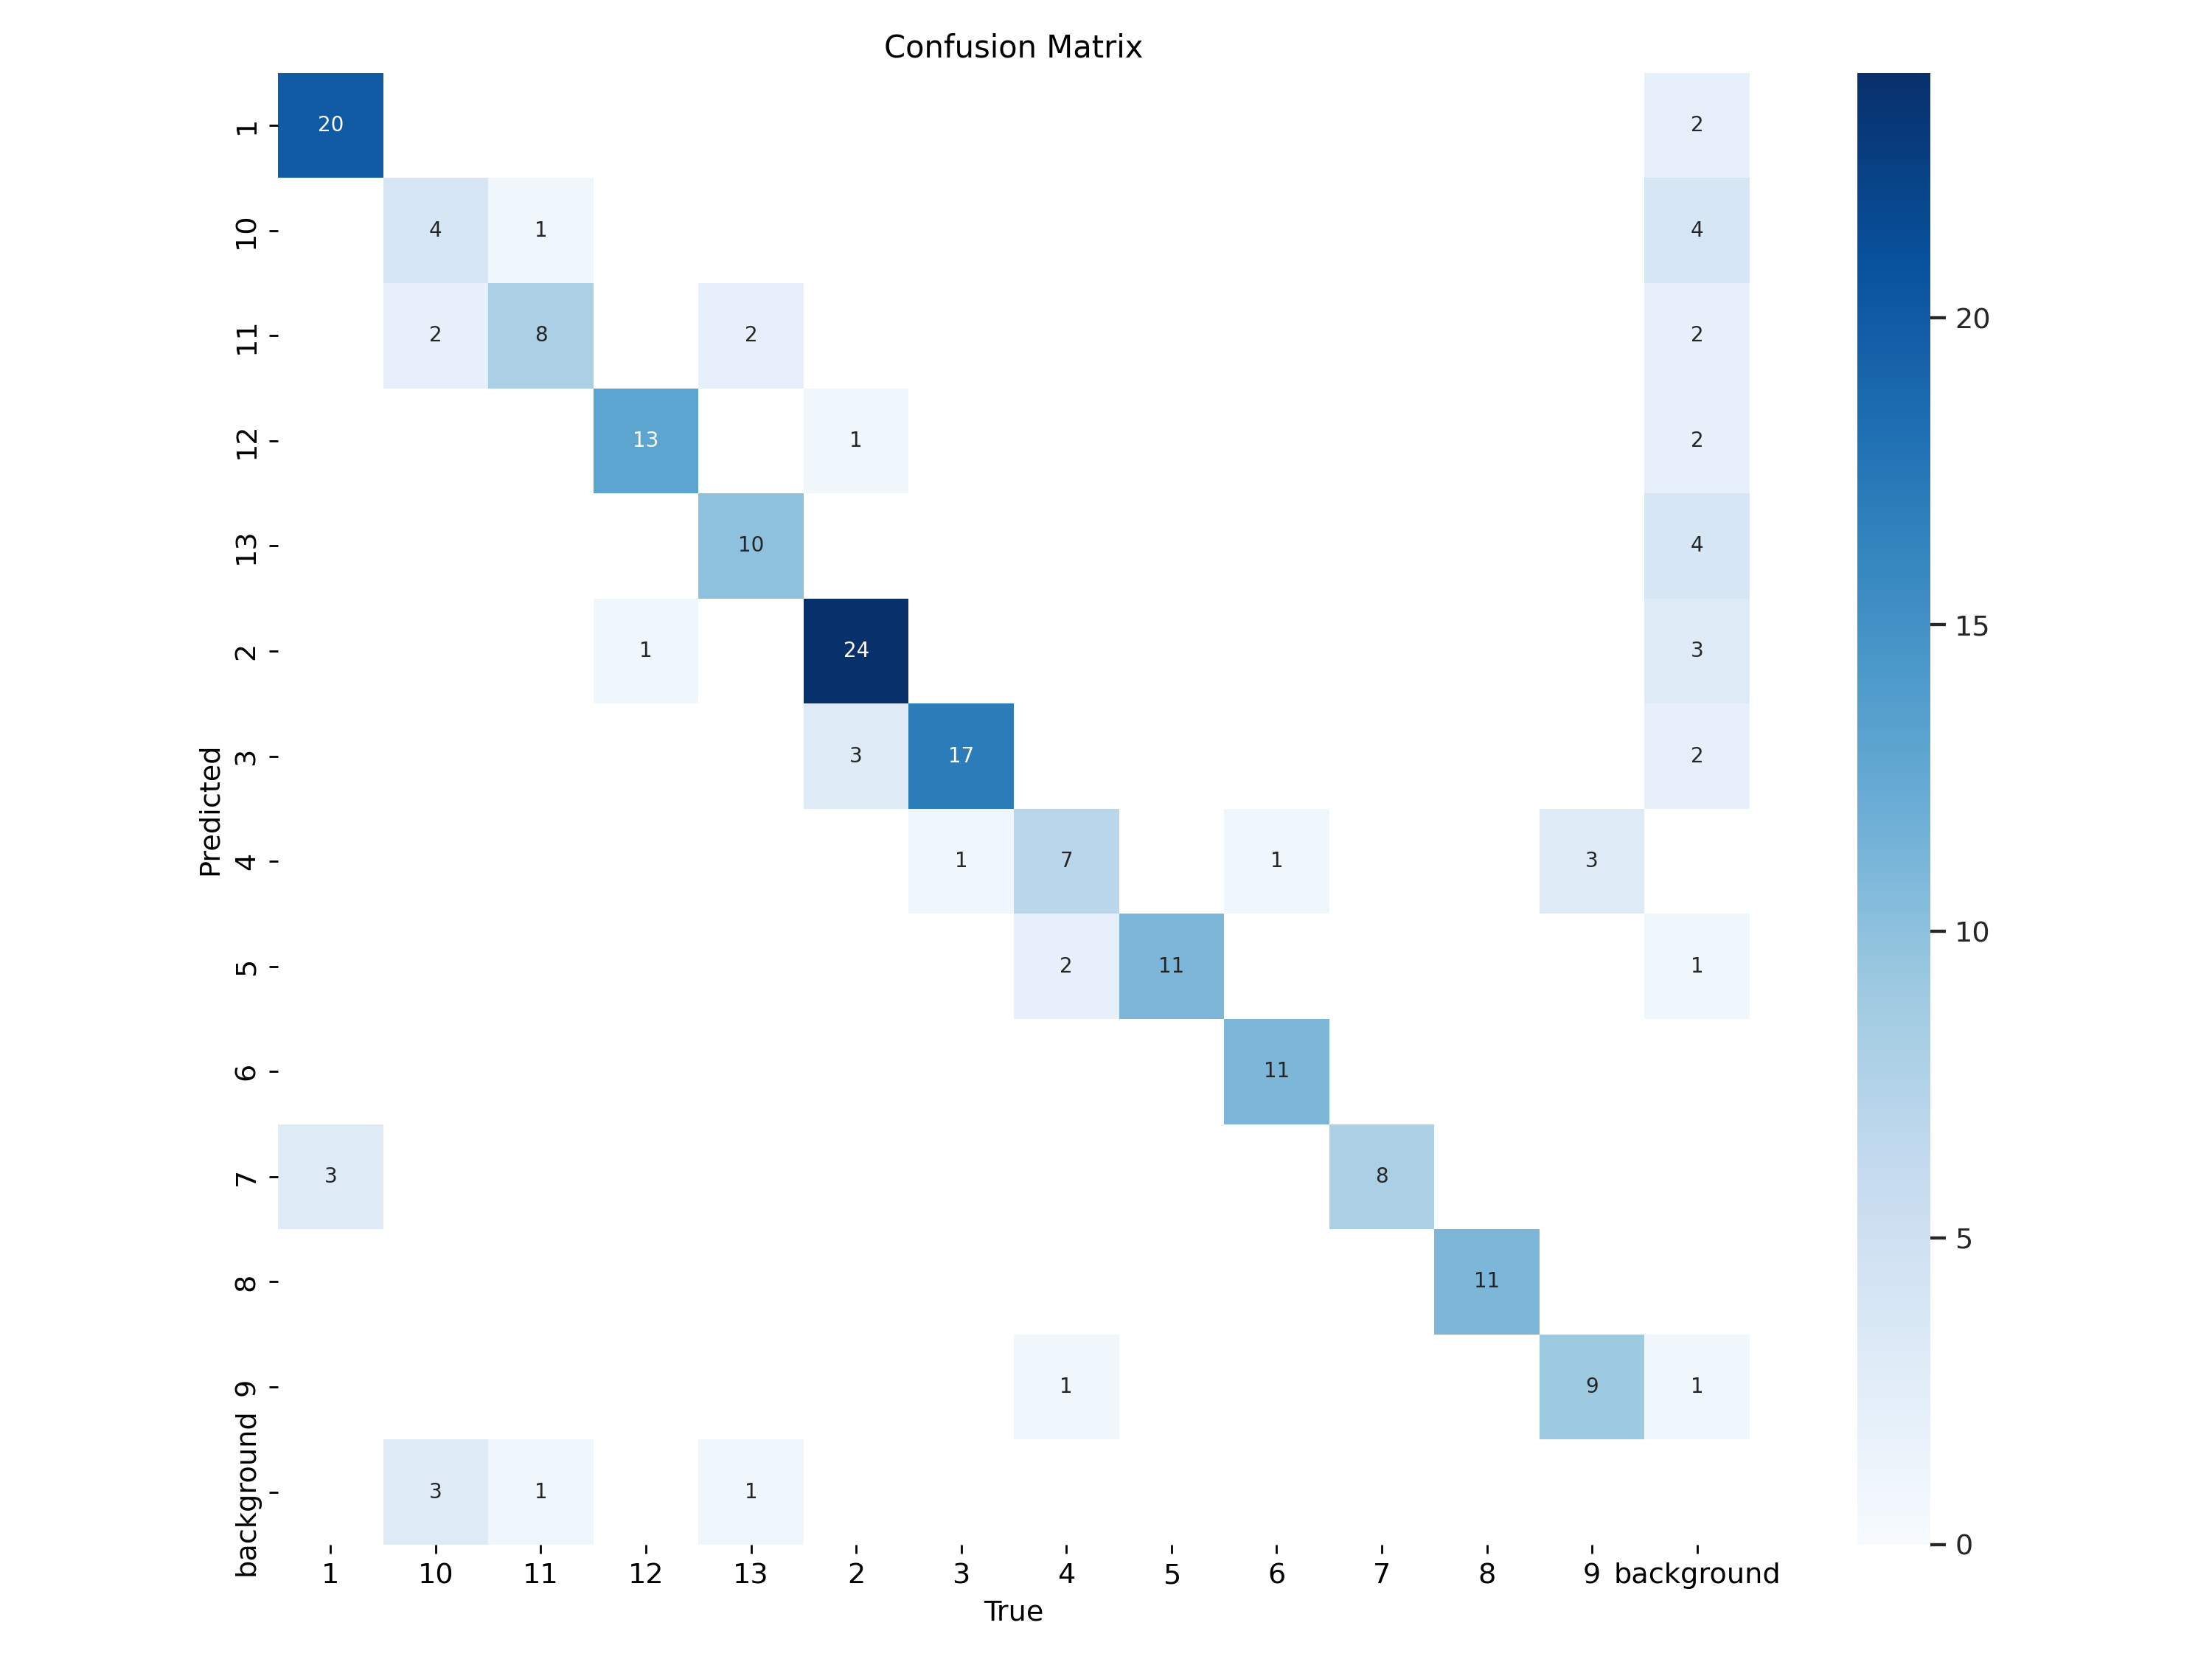

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


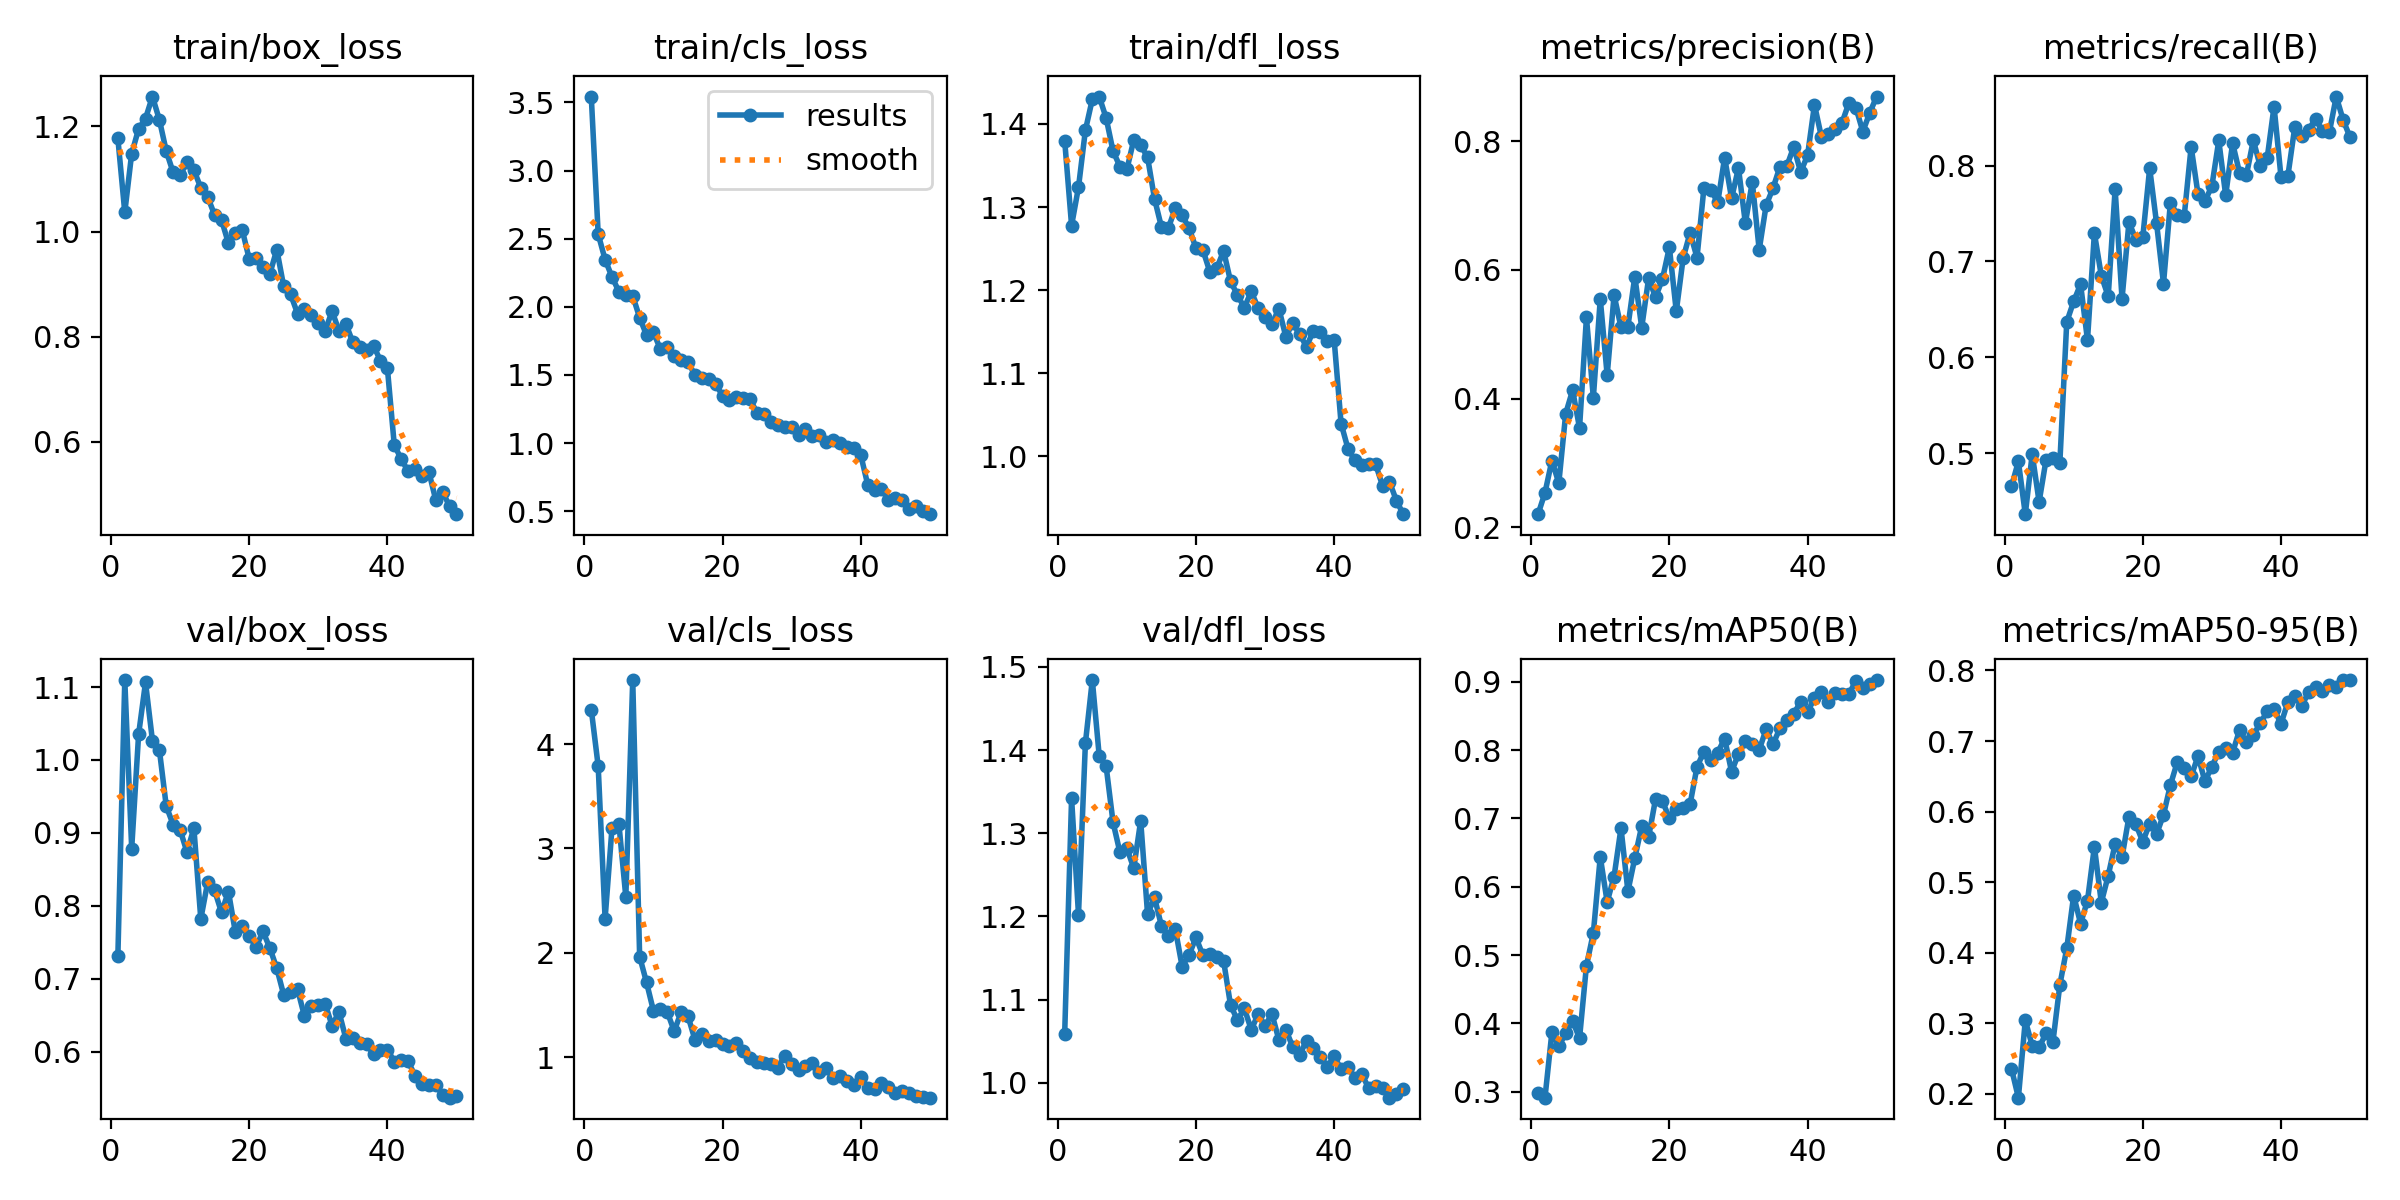

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


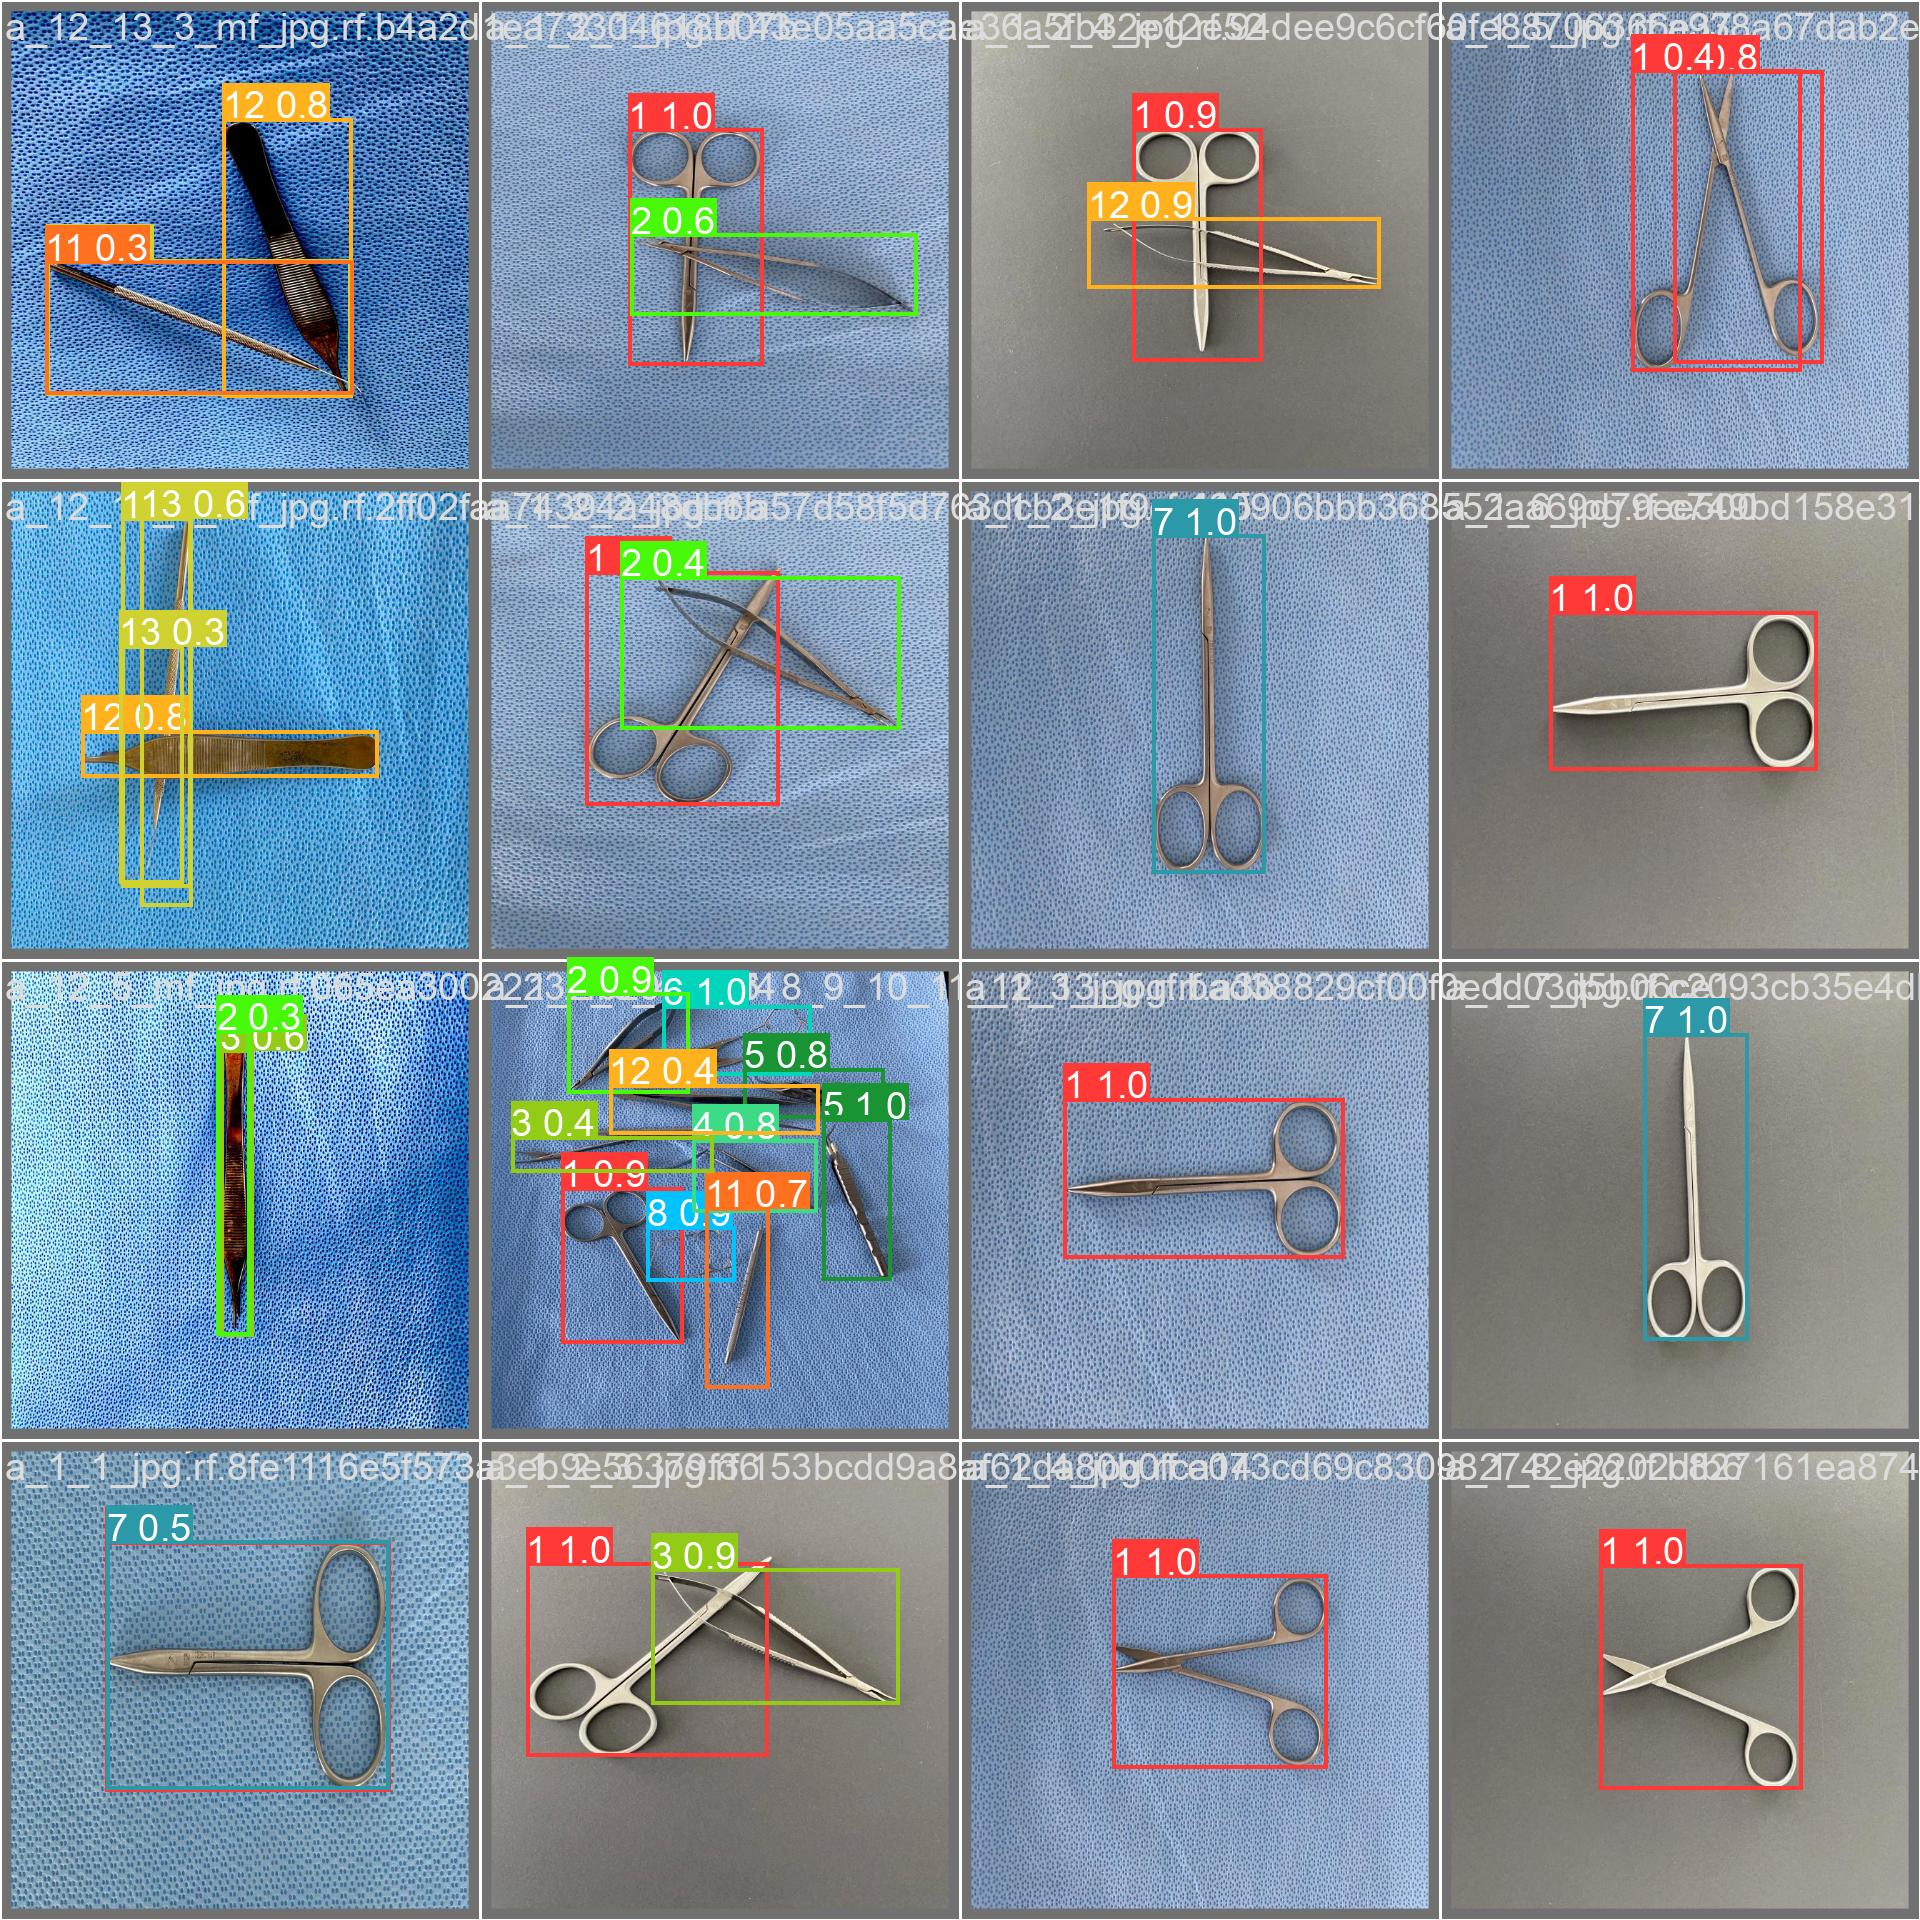

In [9]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Validation

Obtaining Results:

The cells belows illustrated the printed output of the different validaion conditions: lighthing, background and instrument arrengements. However, since the code was run on google colab using the YOLO directories, in order to validate multiple sets changes to the yaml file(configuration files) needed to be performed every time. A screenshot of the obtain results is presented instead. 

The commands below can be apply to the yaml file in order to obtain the given results. 

val: valid/images

*   val_black_light: valid/black_light/images
*   val_black_high: valid/black_high/images
*   val_blue_light: valid/blue_light/images
*   val_blue_high: valid/blue_high/images


*   val_single: valid/single/images
*   val_multiple_occ: valid/multiple_yes_occ/images
*   val_multiple: valid/multiple_no_occ/images


Output valid/black_light/images:

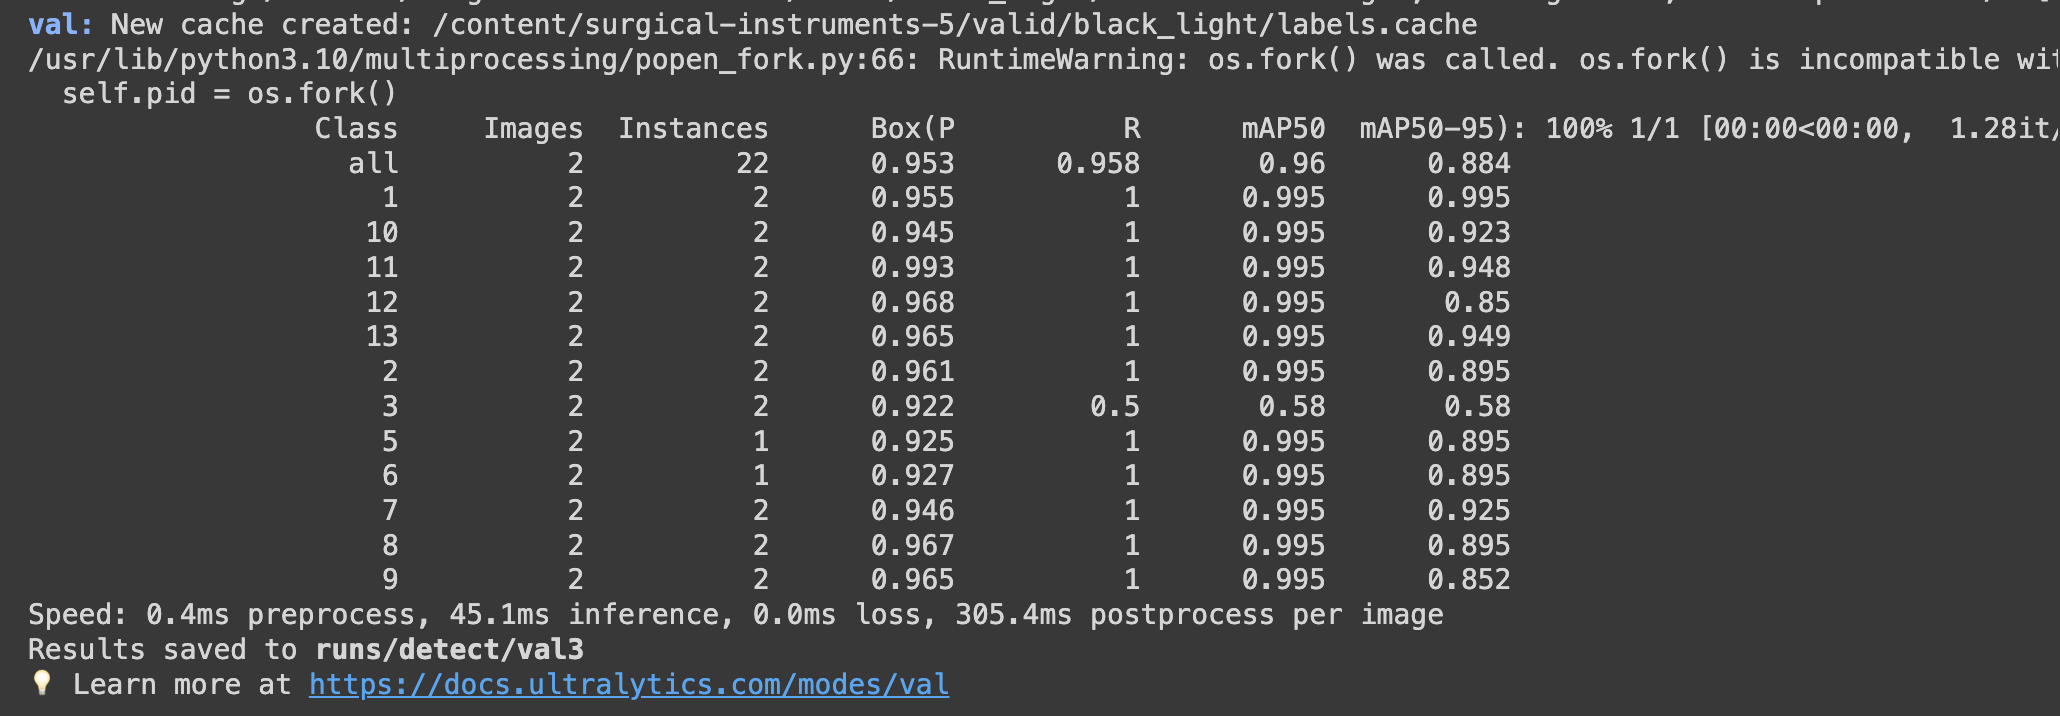

Output valid/black_high/images:

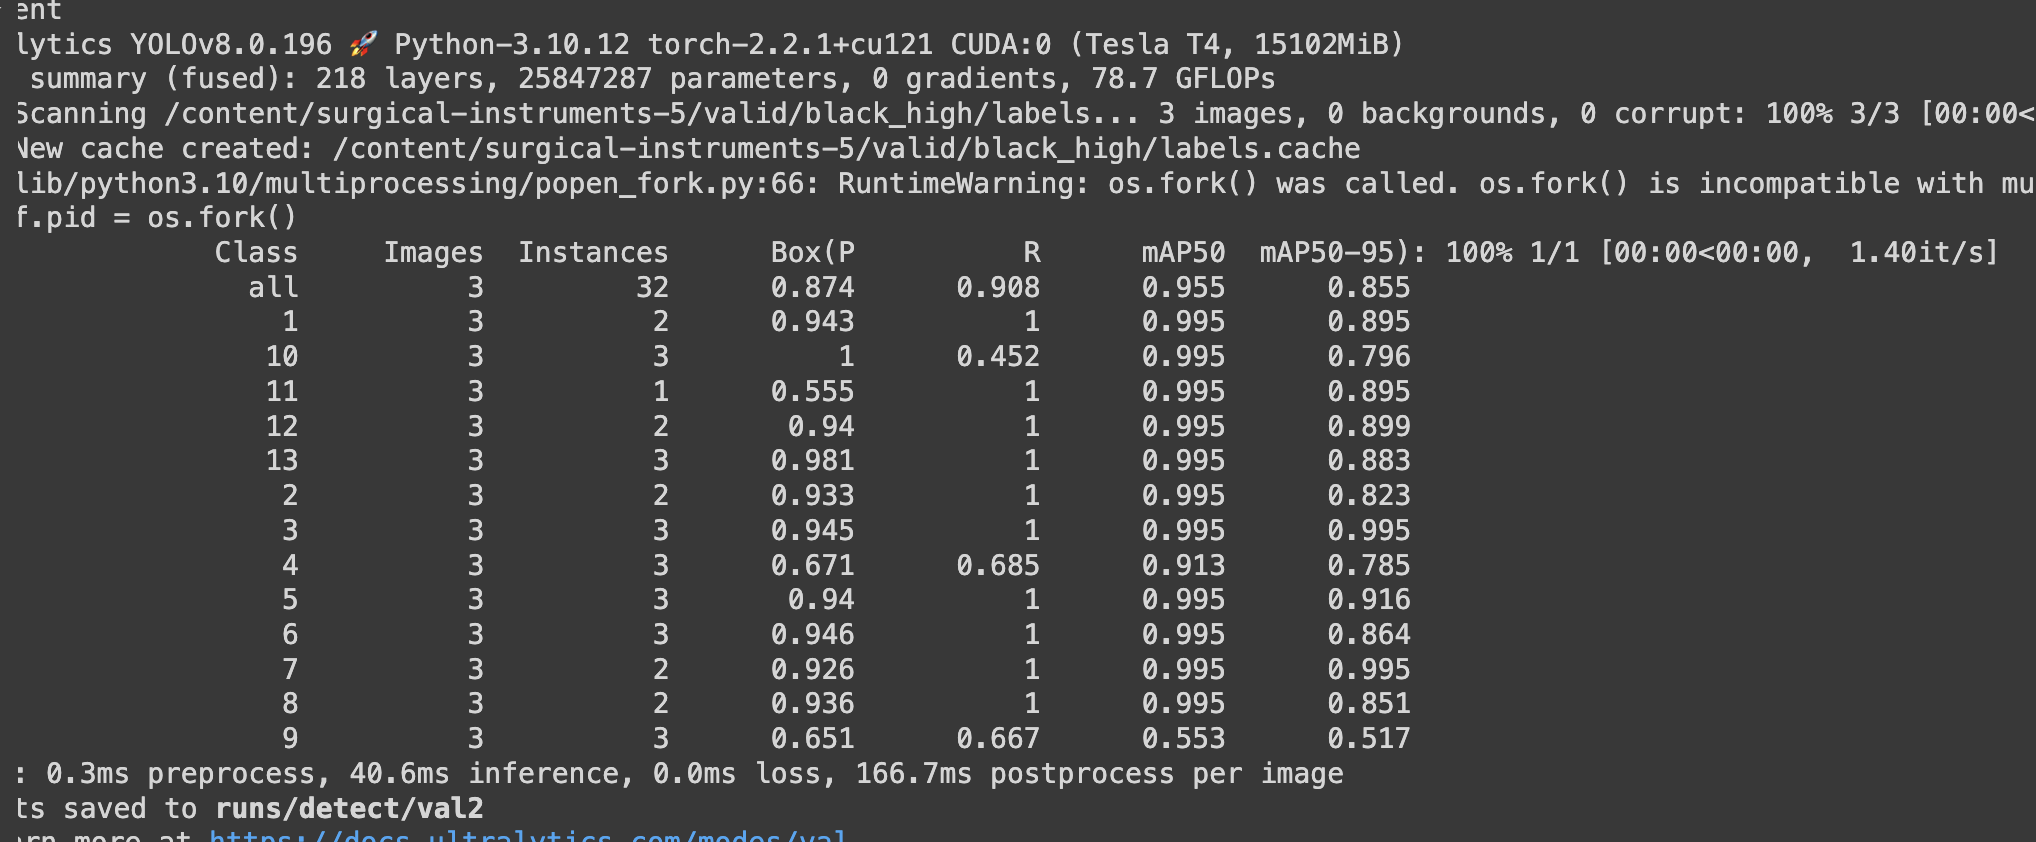

Output valid/blue_light/images:

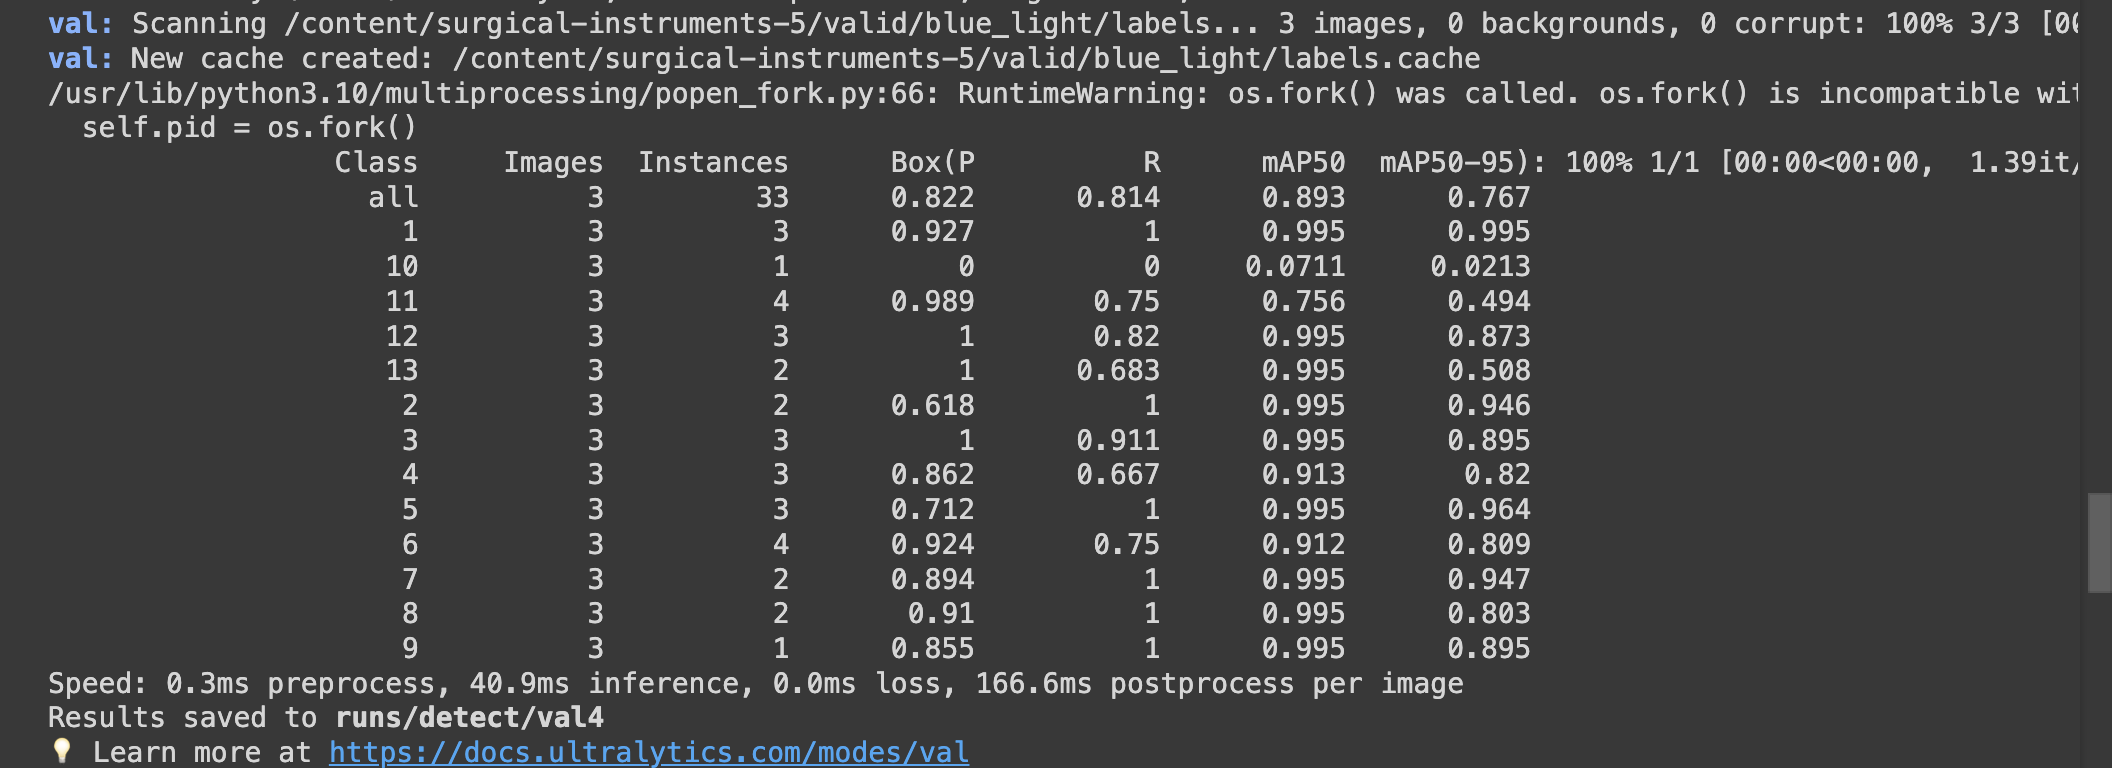

Output valid/blue_high/images:

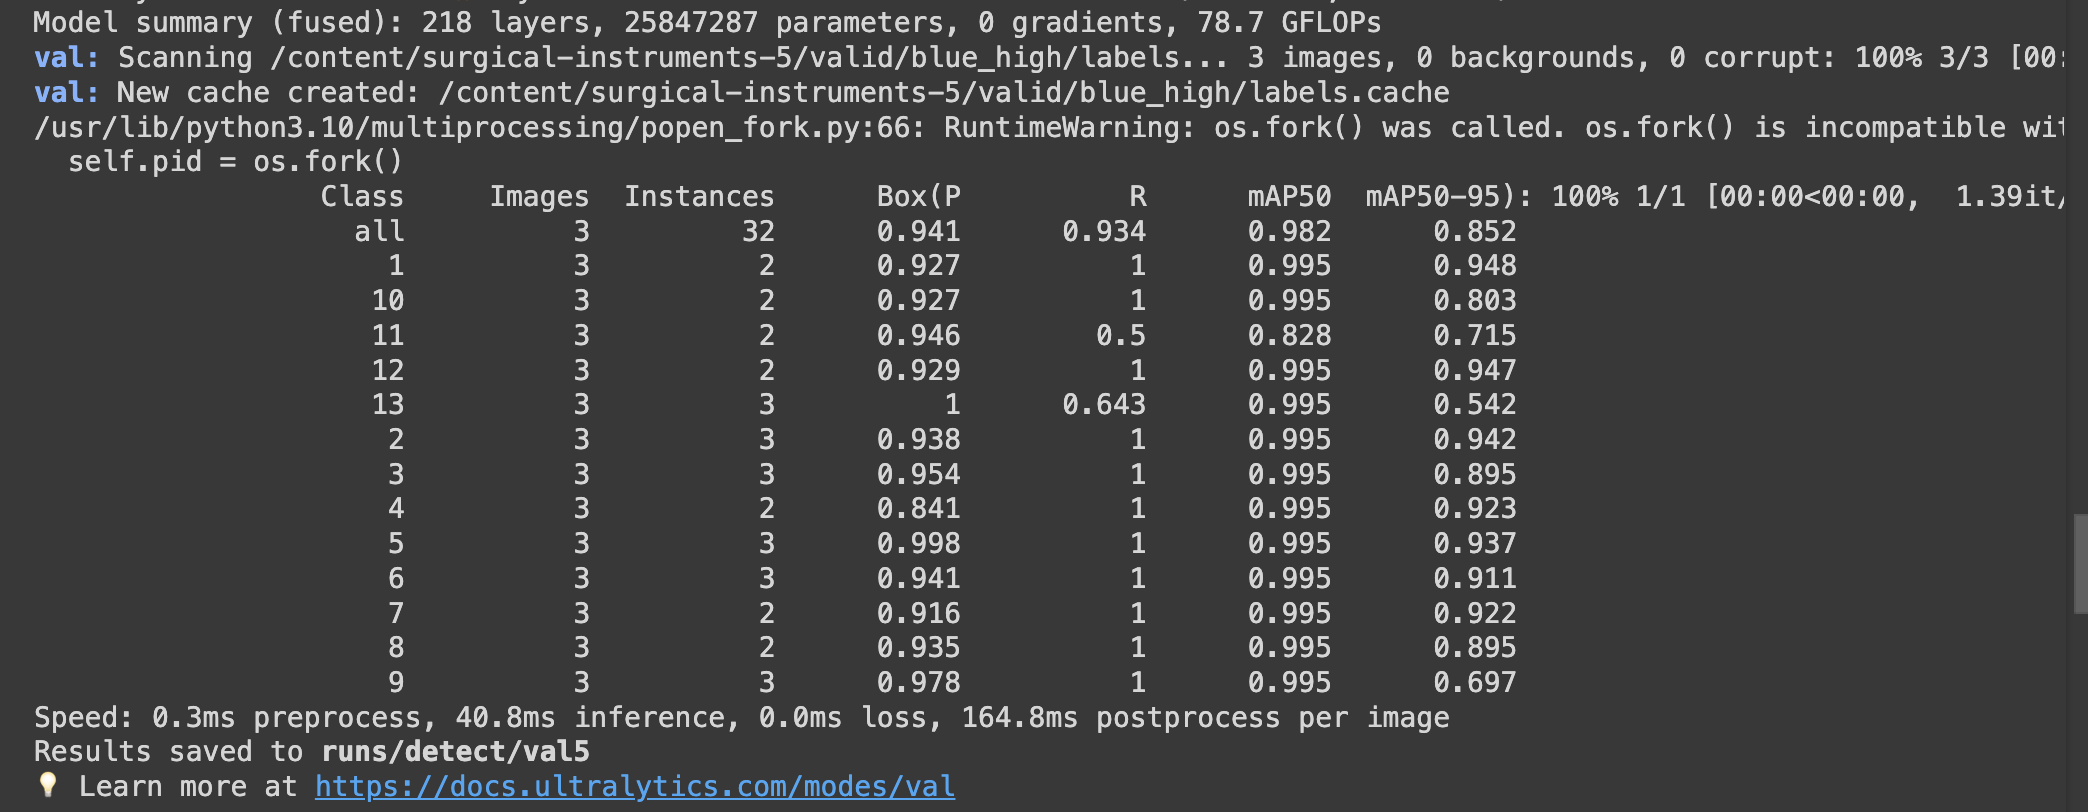

Output valid/single/images:

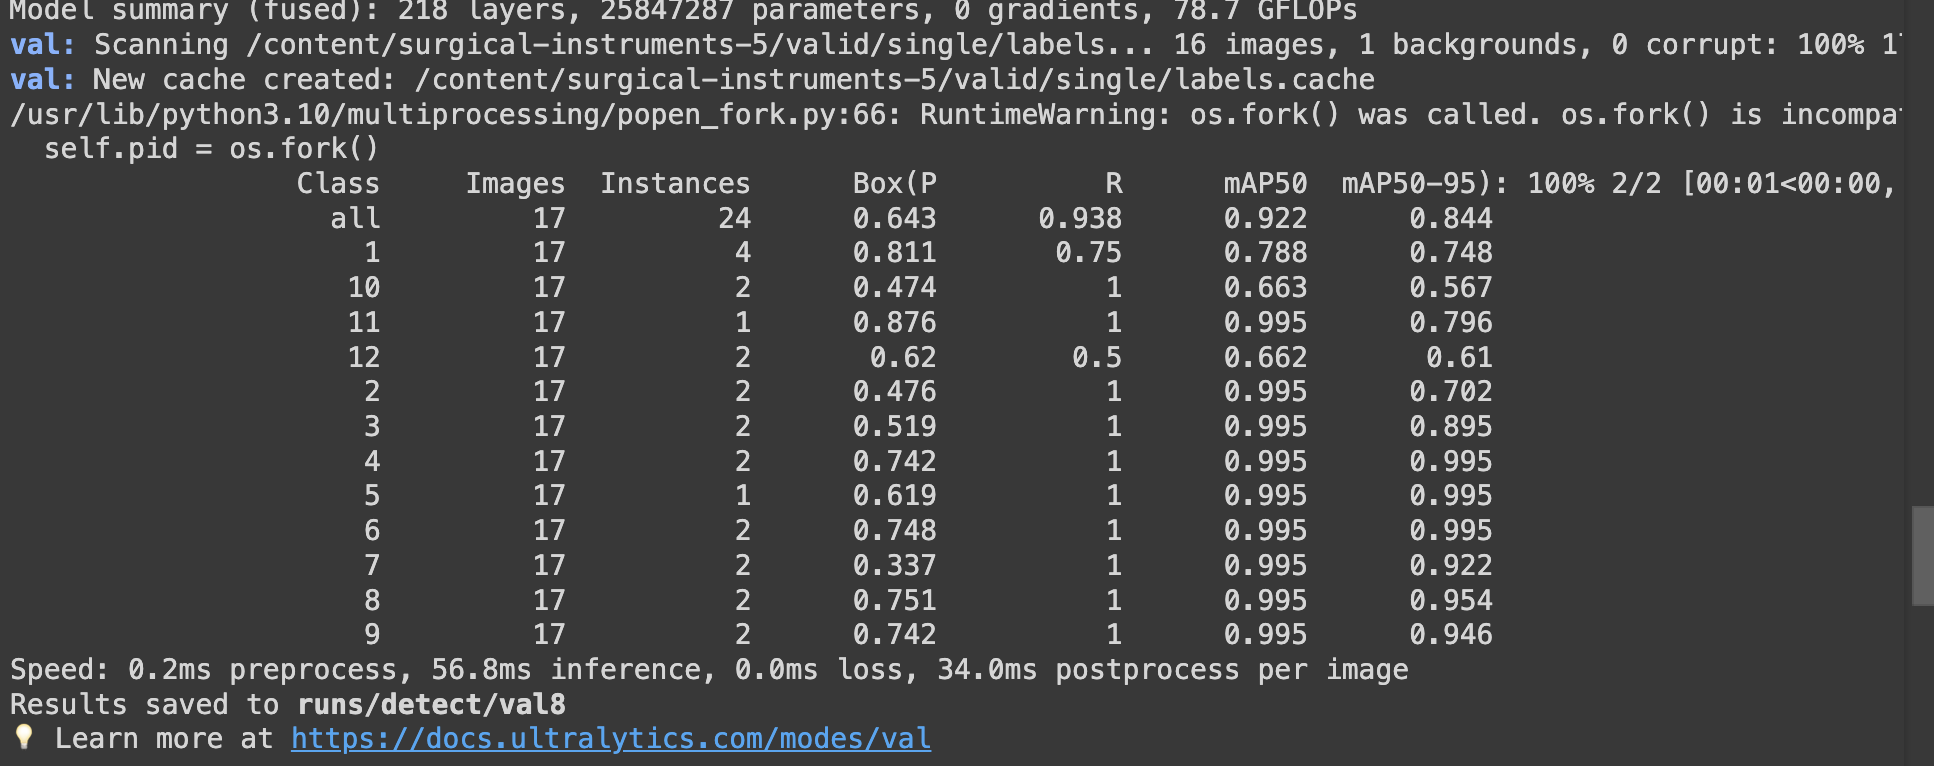

Output  valid/multiple_yes_occ/images:

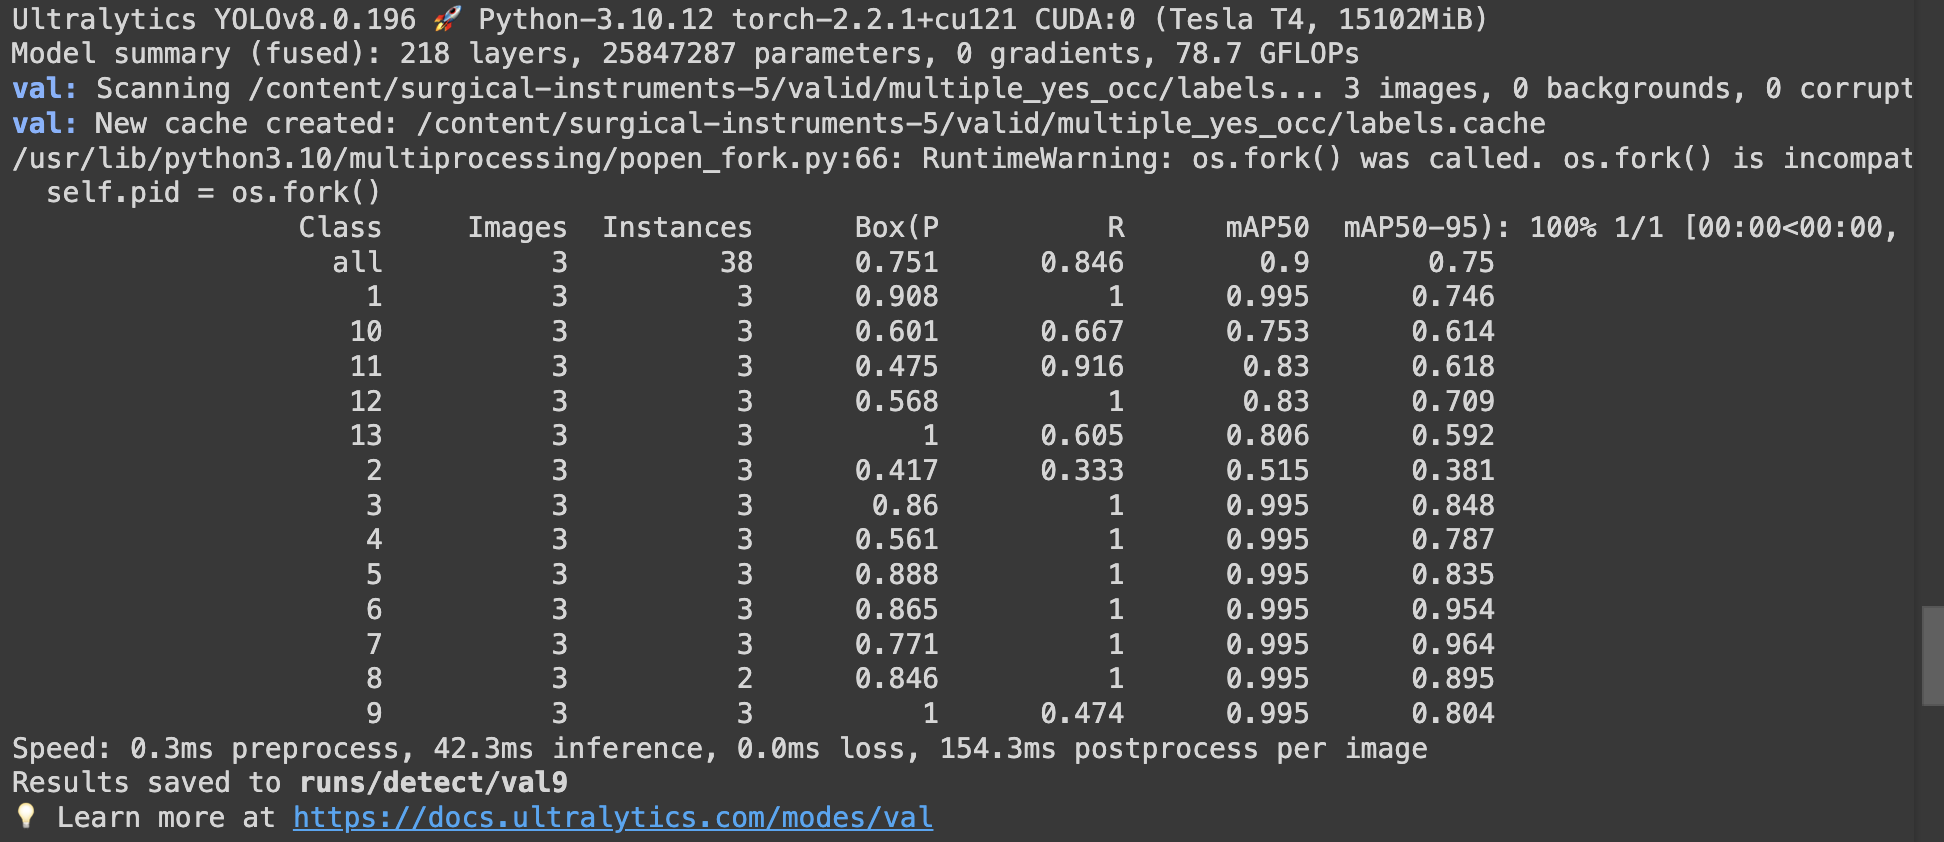

Output valid/multiple_no_occ/images:

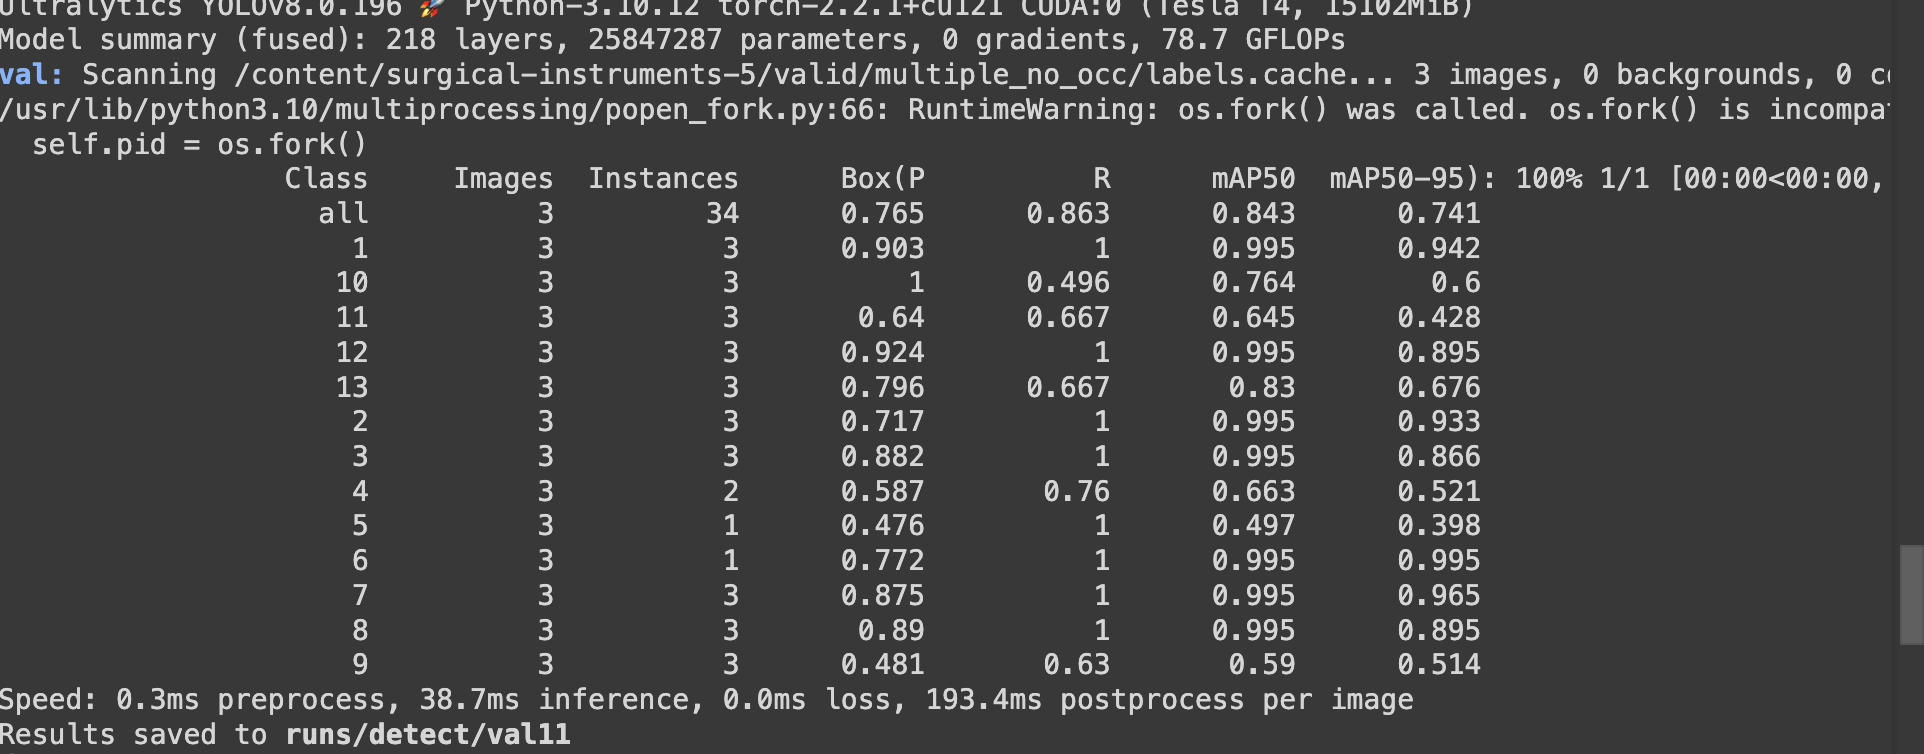

By running the cell below we obtain the results from whole validation set. 

In [32]:

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/surgical-instruments-5/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25847287 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/surgical-instruments-5/valid/labels.cache... 46 images, 0 backgrounds, 0 corrupt: 100% 46/46 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.26s/it]
                   all         46        179      0.869      0.829      0.902      0.787
                     1         46         23       0.98      0.913      0.927      0.879
                    10         46          9      0.849      0.667      0.763       0.62
                    11         46         10      0.768        0.8

### Testing

By running the cell below we test the model on the test set. 

In [ ]:

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/surgical-instruments-5/test/images save=True

### Processing Speed

This part of the code attempts to simulate the processing speed of the model: 

In [13]:
import time
from ultralytics import YOLO

# Calculate inference time
%cd {HOME}
# Load your model
model = YOLO('/content/yolov8m.pt')

# Load your image
image = '/content/surgical-instruments-5/test/images/b_1_2_3_4_5_6_7_9_10_11_12_13_jpg.rf.4c495fa8db8cfb3b1867d10345ebbb99.jpg'

# Timing inference
start_time = time.time()
results = model.predict(image)
end_time = time.time()

inference_time = end_time - start_time
print(f"Inference time: {inference_time} seconds")

/content



image 1/1 /content/surgical-instruments-5/test/images/b_1_2_3_4_5_6_7_9_10_11_12_13_jpg.rf.4c495fa8db8cfb3b1867d10345ebbb99.jpg: 640x640 6 scissorss, 37.2ms
Speed: 1.3ms preprocess, 37.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Inference time: 0.39699864387512207 seconds


By running this cell, we print the predicted images from the test set. 

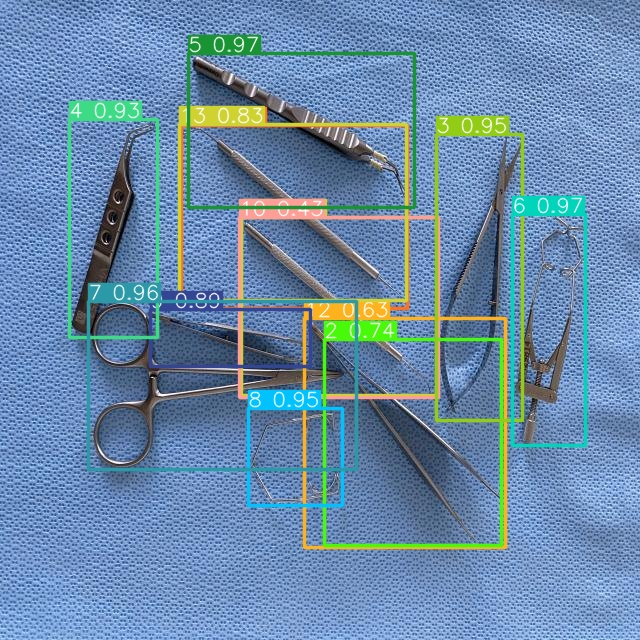

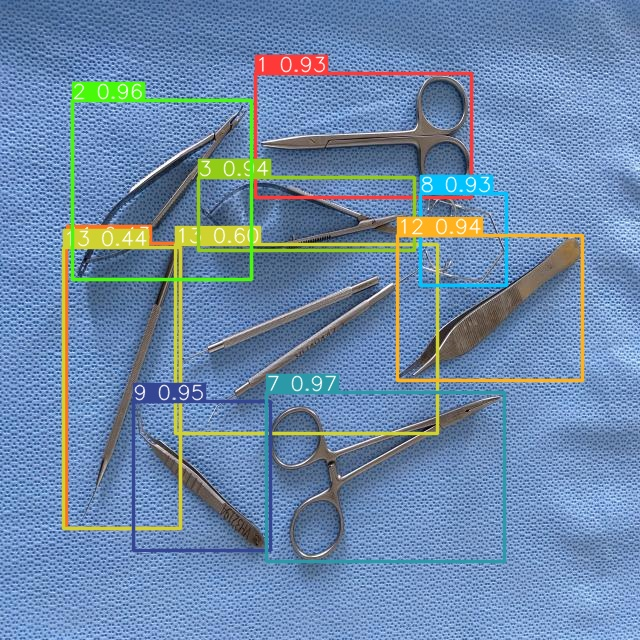

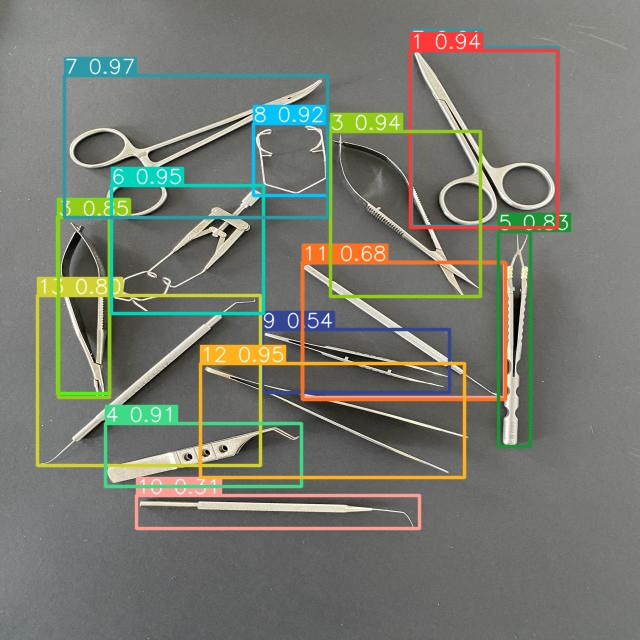

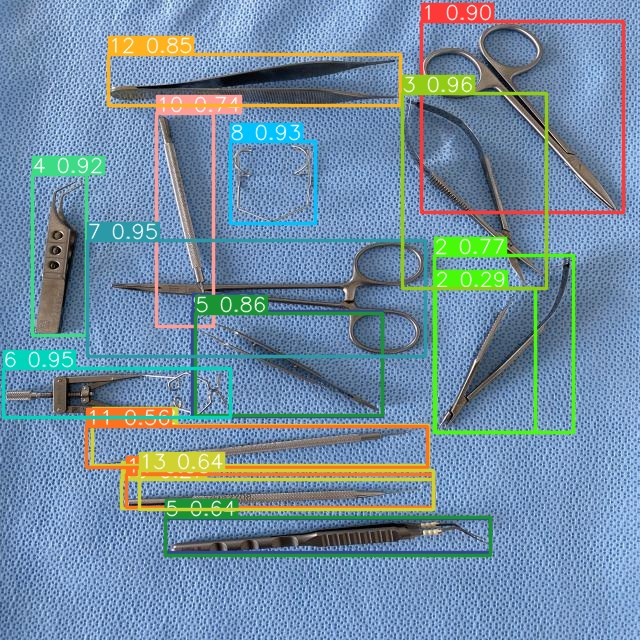

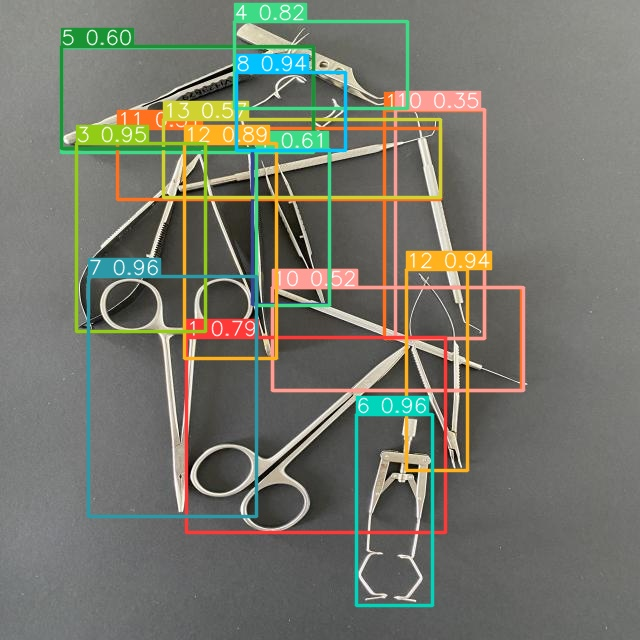

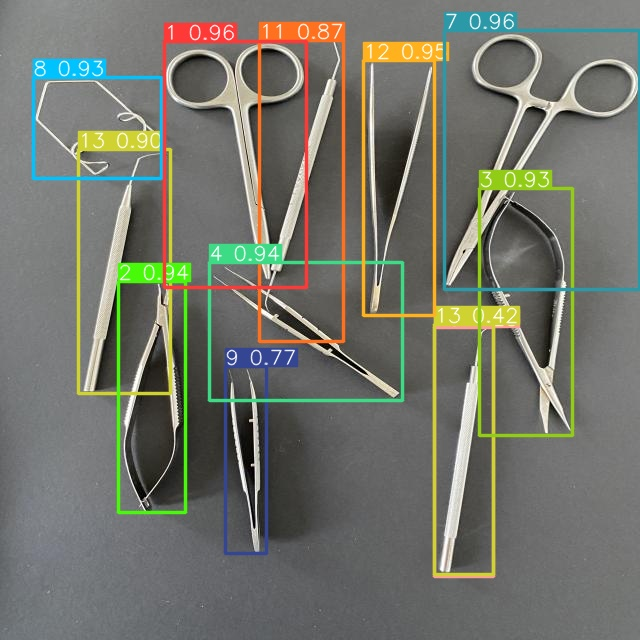

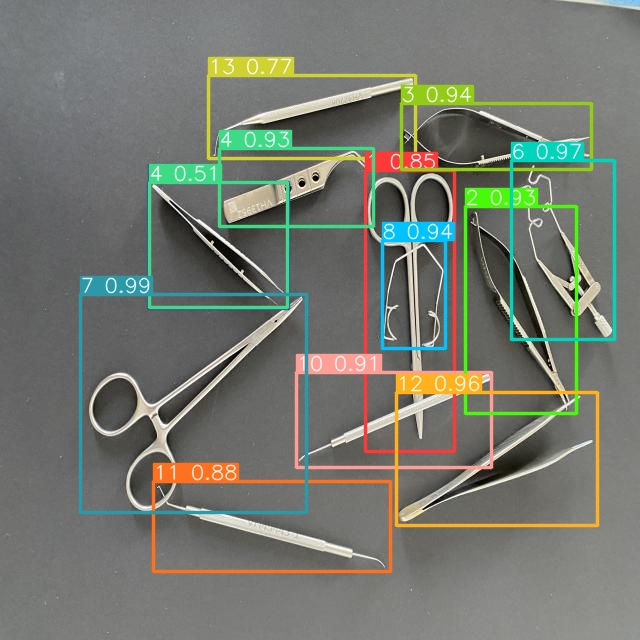

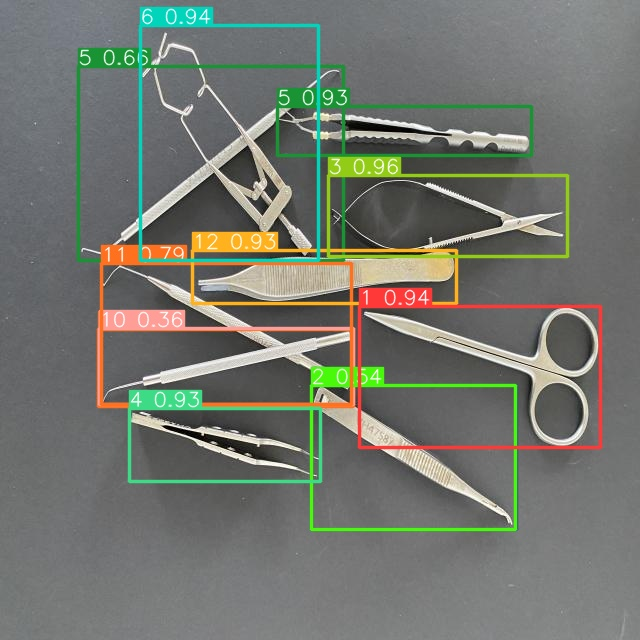

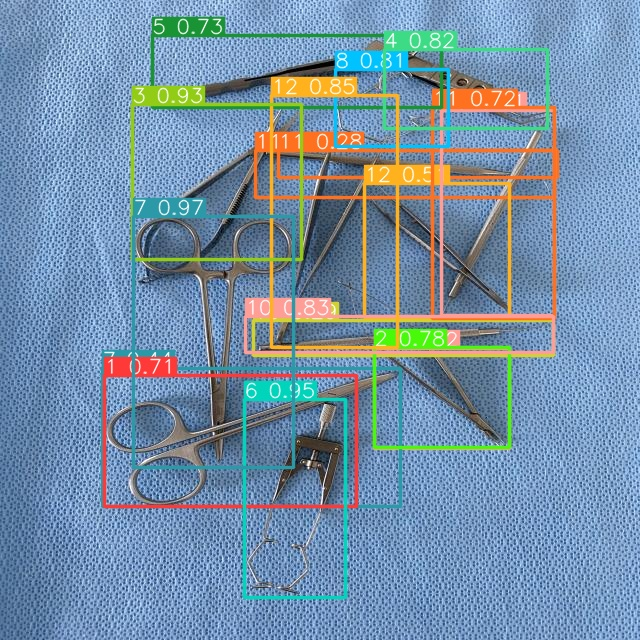

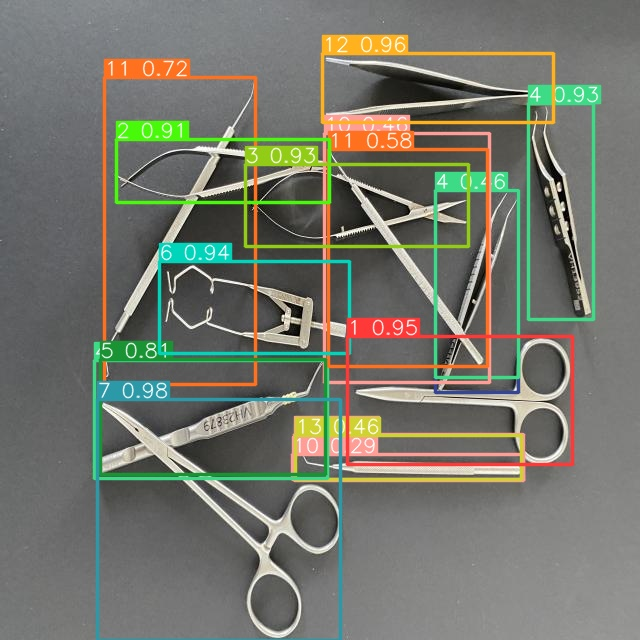

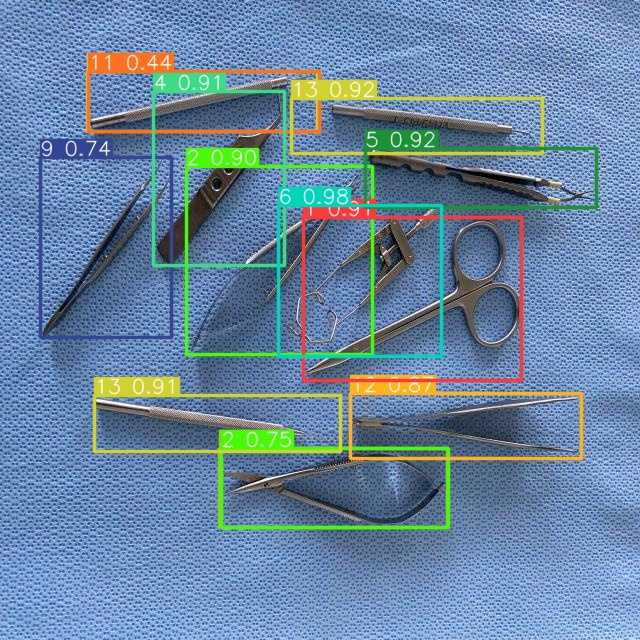

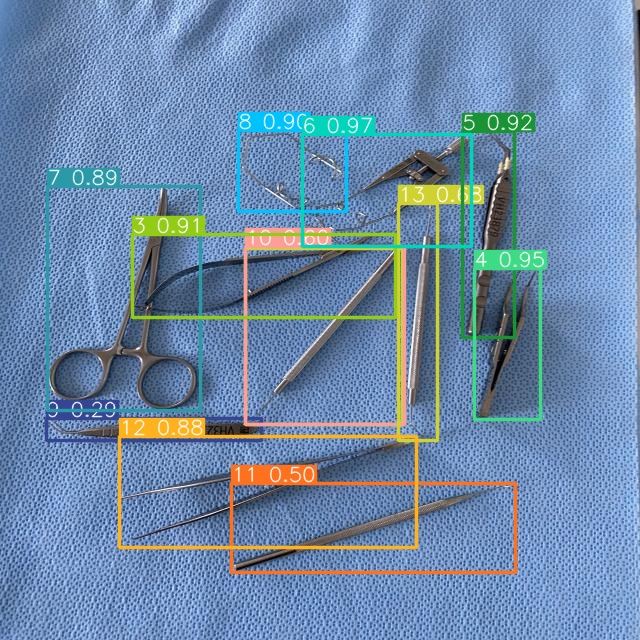

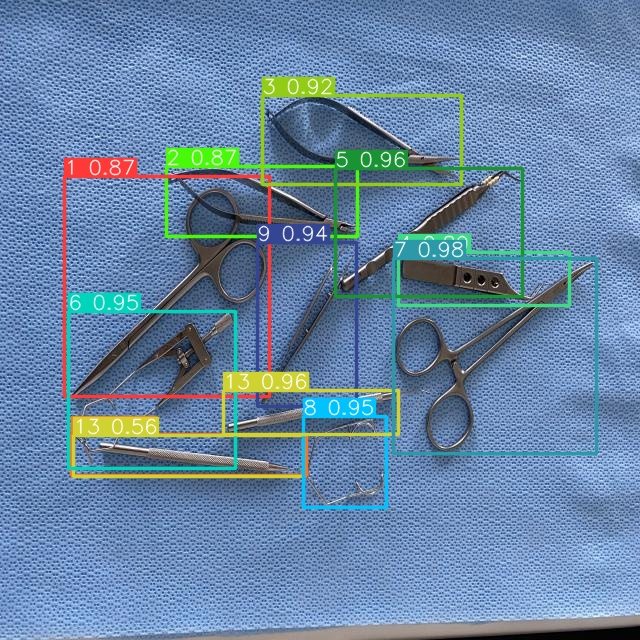

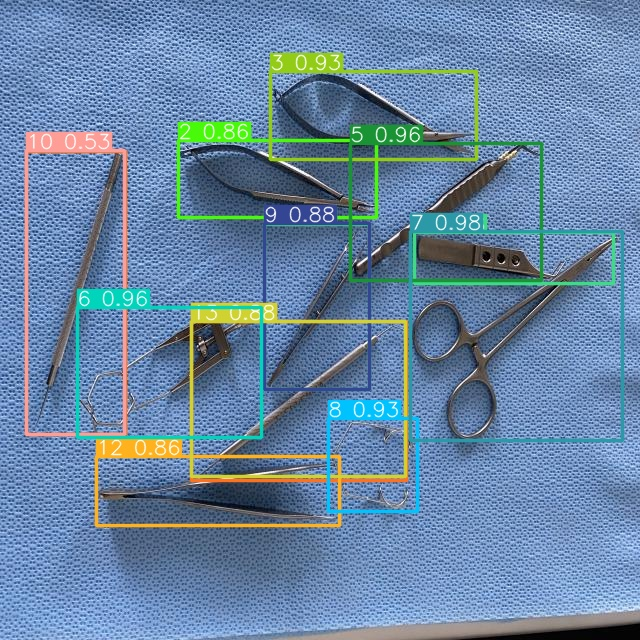

In [14]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:14]:
      display(Image(filename=image_path, width=600))
      print("\n")